Doing K-means and Support vector machine for all the True sounds labeld in meta deta

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py
import matplotlib as mpl
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.decomposition import FastICA, PCA
from sklearn import decomposition
import os
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing



hdf5_file = None

# Dimensionality reduction (to delete all the redundant data)
def dimensionality_reduction(n_component,dataSet):
    
    pca = PCA(n_components=n_component)
    PCA_data = pca.fit_transform(dataSet)
    #abs_value_data = np.absolute(PCA_data)
    return(PCA_data)


# Kmeans clustering
def Kmeans_clustering(clusters,abs_values_trainingData,abs_value_testData):
    kmeans = KMeans(n_clusters = clusters) #Kmean model
    kmeans.fit(abs_values_trainingData) ## Fitting the training data
    centroids = kmeans.cluster_centers_
    print(centroids.shape)
    print(centroids)
    print("cluster membership:\n{}".format(kmeans.labels_))
    predict_labels=kmeans.predict(abs_value_testData,centroids)
    print("predicted membership:\n{}",predict_labels)
    


def read_data(file_name):
    data = pd.read_csv(file_name)
    return data
    

def open_hdf5_file(hdf5Files):
    global hdf5_file
    hdf5_file = h5py.File(str(hdf5Files) ,'r') 
    keys_list=list(hdf5_file.keys())
    return keys_list


def open_as_dataframe(DataframeData):
    global hdf5_file
    data_file =list(hdf5_file[str(DataframeData)])
    return data_file



Visualization for three dogs audios and see the difference between all the features('energy', 'noise', 'pulse', 'tone'),

['energy', 'noise', 'pulse', 'tone']


/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in log
/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in log
/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in log


<Figure size 7200x7200 with 0 Axes>

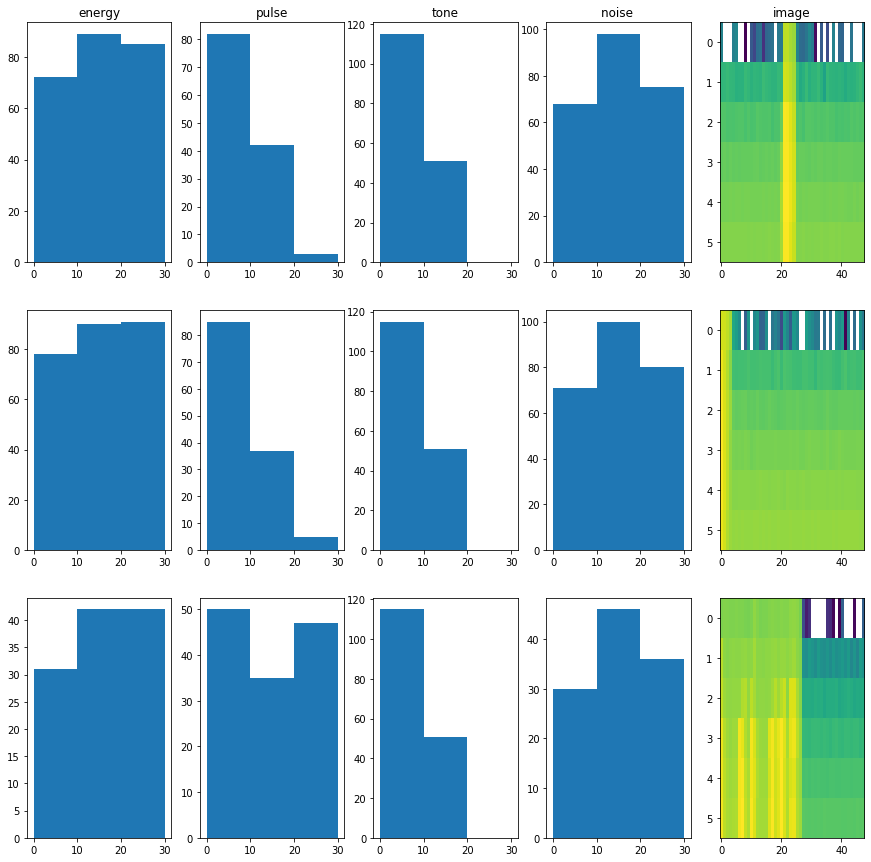

In [2]:
# three dogs sounds dogs visualization
f1 = h5py.File('1-100032-A-0.wav.1.hdf5' ,'r') # dog 1
ls=list(f1.keys())
print(ls)

f2 = h5py.File('1-110389-A-0.wav.1.hdf5' ,'r') # dog 2
ls=list(f2.keys())

f3 = h5py.File('5-9032-A-0.wav.1.hdf5' ,'r') # dog 3
ls=list(f3.keys())


df1=np.array(f1['energy'])
df2=np.array(f2['energy'])
df3=np.array(f3['energy'])

sp1=np.array(f1['pulse']) #dog 1
sp2=np.array(f2['pulse']) #Dog2
sp3=np.array(f3['pulse']) #dog3

t1=np.array(f1['tone']) #dog 1
t2=np.array(f2['tone']) #Dog2
t3=np.array(f3['tone']) #dog3

n1=np.array(f1['noise']) #dog 1
n2=np.array(f2['noise']) #Dog2
n3=np.array(f3['noise']) #dog3



fig= plt.figure(figsize=(100,100))
fig, axes = plt.subplots(nrows=3, ncols=5,figsize=(15,15))
axes[0][0].set_title('energy')
axes[0][0].hist(df1.flatten(), bins=[0,10,20,30])
axes[1][0].hist(df2.flatten(), bins=[0,10,20,30])
axes[2][0].hist(df3.flatten(), bins=[0,10,20,30])


axes[0][1].set_title('pulse')
axes[0][1].hist(sp1.flatten(), bins=[0,10,20,30])
axes[1][1].hist(sp2.flatten(), bins=[0,10,20,30])
axes[2][1].hist(sp3.flatten(), bins=[0,10,20,30])

axes[0][2].set_title('tone')
axes[0][2].hist(t1.flatten(), bins=[0,10,20,30])
axes[1][2].hist(t1.flatten(), bins=[0,10,20,30])
axes[2][2].hist(t1.flatten(), bins=[0,10,20,30])

axes[0][3].set_title('noise ')
axes[0][3].hist(n1.flatten(), bins=[0,10,20,30])
axes[1][3].hist(n2.flatten(), bins=[0,10,20,30])
axes[2][3].hist(n3.flatten(), bins=[0,10,20,30])

axes[0][4].set_title('image')
axes[0][4].imshow(np.log(df1),aspect='auto')
axes[1][4].imshow(np.log(df2),aspect='auto')
axes[2][4].imshow(np.log(df3),aspect='auto')


plt.show()

ploting using the histogram

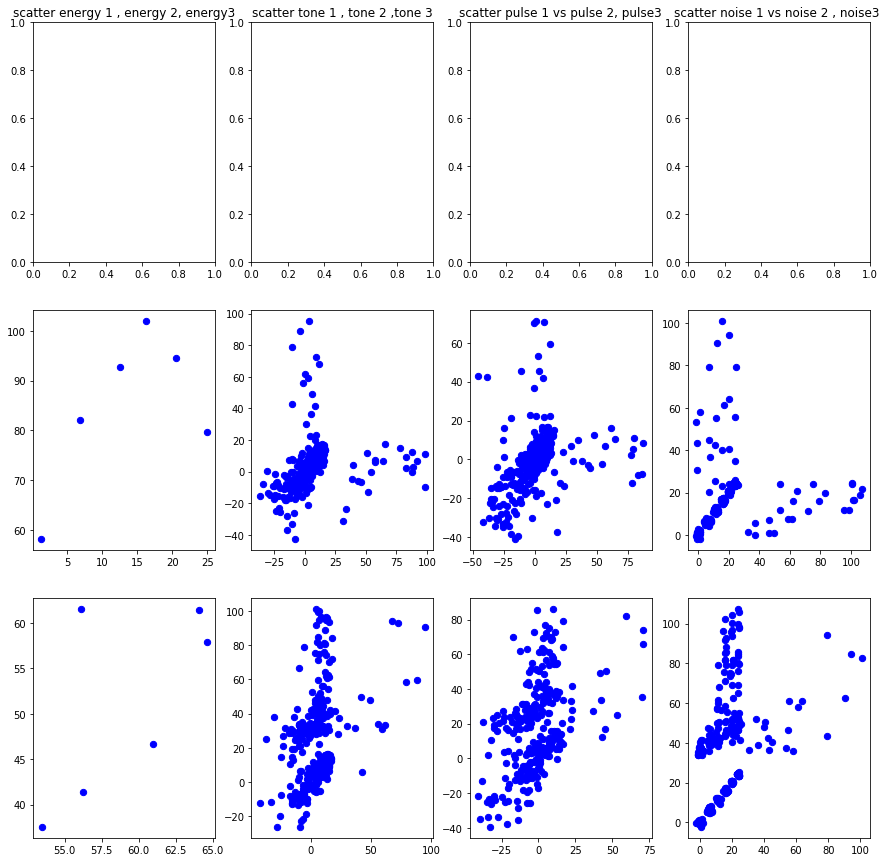

In [3]:

fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(15,15))

axes[0][0].set_title('scatter energy 1 , energy 2, energy3')
axes[1][0].scatter(df1[:,0],df2[:,0],marker='o',s=40,c='b')
axes[2][0].scatter(df2[:,1],df3[:,1],marker='o',s=40,c='b')


axes[0][1].set_title('scatter tone 1 , tone 2 ,tone 3')
axes[1][1].scatter(t1,t2,marker='o',s=40,c='b')
axes[2][1].scatter(t2,t3,marker='o',s=40,c='b')

axes[0][2].set_title('scatter pulse 1 vs pulse 2, pulse3')
axes[1][2].scatter(sp1,sp2,marker='o',s=40,c='b')
axes[2][2].scatter(sp2,sp3,marker='o',s=40,c='b')


axes[0][3].set_title('scatter noise 1 vs noise 2 , noise3 ')
axes[1][3].scatter(n1,n2,marker='o',s=40,c='b')
axes[2][3].scatter(n2,n3,marker='o',s=40,c='b')



In [3]:
Data=read_data('esc50.csv') 

print(Data)

# all classification extraction from metadata

dataArray=np.array(Data)

j=4
i=0
False_data=list()  # ERON: Why false?
False_data_category=list()
for row in dataArray:
    if not row[4]:
        False_data.append(row[0])
        False_data_category.append(row[3])
        i+=1
    
#print(len(False_data))

False_categories = {'audio': False_data, 'category': False_data_category}
False_df = pd.DataFrame(data=False_categories)


False_array= np.array(False_df)
target_data_false=pd.DataFrame(False_array[:,0])

#print(target_data_false)

labels_False=False_array[:,1]
print(False_array.shape)

#False_array=False_arranged[np.argsort(False_arranged[:,1])]
#print("false array",False_array) 

               filename  fold  target        category  esc10  src_file take
0      1-100032-A-0.wav     1       0             dog   True    100032    A
1     1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2     1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3     1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4     1-101296-A-19.wav     1      19    thunderstorm  False    101296    A
...                 ...   ...     ...             ...    ...       ...  ...
1995   5-263831-B-6.wav     5       6             hen  False    263831    B
1996  5-263902-A-36.wav     5      36  vacuum_cleaner  False    263902    A
1997   5-51149-A-25.wav     5      25       footsteps  False     51149    A
1998    5-61635-A-8.wav     5       8           sheep  False     61635    A
1999     5-9032-A-0.wav     5       0             dog   True      9032    A

[2000 rows x 7 columns]
(1600, 2)


extract all the audios and all the labels from metadata

In [194]:
# seperate the True labeled uit the False labeld 
j=4
i=0
True_data_fold=list()
True_data=list()
True_data_category=list()
for row in dataArray:
    if row[4]:
        True_data.append(row[0])
        True_data_category.append(row[3])
        True_data_fold.append(row[1])
        i+=1
    
#print(len(True_data))

True_categories = {'audio': True_data, 'category': True_data_category, 'folds':True_data_fold }
True_df = pd.DataFrame(data=True_categories)
print(True_df)

True_df=np.array(True_df)

train_data=np.array(True_df[:,0])

print(train_data.shape)
labels_data=np.array(True_df[:,1])
#print(folds_data)
True_array= np.array(True_df)

#True_array=True_arranged[np.argsort(True_arranged[:,0])] sorting the data 
#print(True_array)



                 audio        category  folds
0     1-100032-A-0.wav             dog      1
1     1-110389-A-0.wav             dog      1
2    1-116765-A-41.wav        chainsaw      1
3     1-17150-A-12.wav  crackling_fire      1
4    1-172649-A-40.wav      helicopter      1
..                 ...             ...    ...
395   5-233160-A-1.wav         rooster      5
396   5-234879-A-1.wav         rooster      5
397   5-234879-B-1.wav         rooster      5
398  5-235671-A-38.wav      clock_tick      5
399     5-9032-A-0.wav             dog      5

[400 rows x 3 columns]
(400,)


to open the audios I need it in hdf5 files 

In [8]:
import os
#### dataSet

data_list=list()
data_files=list()
for item in train_data:
    suffix = '.1.hdf5'
    data_files=os.path.join(str(item )+ suffix)
    data_list.append(data_files)
    
print(data_list[0])# 12files 
print("length of the new list",len(data_list))
#False_target_data=np.array(False_list)
#print(data_list)


1-100032-A-0.wav.1.hdf5
length of the new list 400


soort all the featurs, and extract all the featurs and stack them seperately. .


In [10]:

# training Data (True labeled)

energy_data=list()
noise_data=list()
tone_data=list()
pulse_data=list()
energy_data1=list()
noise_data1=list()
tone_data1=list()
pulse_data1=list()
opened_dataframe=list()


for data in data_list:
    ls1=open_hdf5_file(data) #('energy','pulse','noise','tone')
    for index in ls1:
        if str(index)=='energy': 
            opened_dataframe=open_as_dataframe(index)
            percentile_energy_data=np.percentile(opened_dataframe, 95, axis=1) # percentage along row 
            energy_data.append(percentile_energy_data)
            

        elif str(index)=='noise':
            opened_dataframe=open_as_dataframe(index)
            percentile_noise_data=np.percentile(opened_dataframe, 95, axis=1)
            noise_data.append(percentile_noise_data)
           

        elif str(index)=='pulse':
            opened_dataframe=open_as_dataframe(index)
            percentile_pulse_data=np.percentile(opened_dataframe, 95, axis=1)
            pulse_data.append(percentile_pulse_data)
            

        elif str(index)=='tone':
            opened_dataframe=open_as_dataframe(index)
            percentile_tone_data=np.percentile(opened_dataframe, 95, axis=1)
            tone_data.append(percentile_tone_data)   
           
            
    energy_data1=np.vstack(energy_data)
    noise_data1=np.vstack(noise_data)
    pulse_data1=np.vstack(pulse_data)
    tone_data1=np.vstack(tone_data)


print("length of the energy data",energy_data1.shape)#,np.size(energy_data,1))
#print("the first row of the energy data array",energy_data)

print("length of the noise data",noise_data1.shape)#,np.size(noise_data,1)
#print("the first row of the noise data array",noise_data[0])

print("length of the tone data",tone_data1.shape)#,np.size(tone_data,1)
#print("the first row of the tone data array",tone_data[0])

print("length of the pulse data",pulse_data1.shape)#,np.size(pulse_data,1)
#print("the  pulse data array",pulse_data[0])
 

length of the energy data (400, 6)
length of the noise data (400, 6)
length of the tone data (400, 6)
length of the pulse data (400, 6)


In [12]:
arr1=np.hstack((energy_data1,pulse_data1))
arr2=np.hstack((arr1,tone_data1))
dataSet=np.hstack((arr2,noise_data1))

print(dataSet.shape)
print(dataSet[:,0:11].shape)


(400, 24)
(400, 11)


In [40]:
from sklearn.model_selection import train_test_split  # ERON: This is the wrong function to use here because it doesn't take into account the information provided in the ESC-50 paper. That paper introduced folds that you need to respect.

X_train, X_test, y_train, y_test = train_test_split(
    dataSet, labels_data, test_size=0.25, random_state=0)

print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)


(300, 24) (300,)
(100, 24) (100,)


In [41]:
transposed_Train_data=np.transpose(X_train)
transposed_test_data=np.transpose(X_test)

In [76]:
print(y_test)
print(len(y_test))
#print(np.sort(y_test))
y_test_labels=[0,1,9,1,0,9,9,0,0,9,4,0,3,3,
              2,6,8,0,3,5,6,3,2,7,7,1,8,5,6,9,
              0,1,6,1,4,4,6,7,6,4,1,0,5,4,4,0,1,
              7,7,4,0,6,7,2,5,3,7,6,1,8,2,0,5,
              7,2,1,6,5,1,4,5,7,8,0,8,2,4,1,9,6,
              2,9,0,8,3,1,2,6,7,7,5,2,7,9,5,7,6,2,5,8]
print(len(y_test_labels))
print(np.sort(y_test))
y_test1=['chainsaw','clock tick','crackling fire','crying baby','dog','helicopter','rain',
        'rooster','sea waves','sneezing']

"""14 chainsaw
13 clock tick
10 crackling fier
6 crying baby
10 dog
10 helecopter
10 rain
12 rooster
6 sea waves
8 sneezing"""

['chainsaw' 'clock_tick' 'sneezing' 'clock_tick' 'chainsaw' 'sneezing'
 'sneezing' 'chainsaw' 'chainsaw' 'sneezing' 'dog' 'chainsaw'
 'crying_baby' 'crying_baby' 'crackling_fire' 'rain' 'sea_waves'
 'chainsaw' 'crying_baby' 'helicopter' 'rain' 'crying_baby'
 'crackling_fire' 'rooster' 'rooster' 'clock_tick' 'sea_waves'
 'helicopter' 'rain' 'sneezing' 'chainsaw' 'clock_tick' 'rain'
 'clock_tick' 'dog' 'dog' 'rain' 'rooster' 'rain' 'dog' 'clock_tick'
 'chainsaw' 'helicopter' 'dog' 'dog' 'chainsaw' 'clock_tick' 'rooster'
 'rooster' 'dog' 'chainsaw' 'rain' 'rooster' 'crackling_fire' 'helicopter'
 'crying_baby' 'rooster' 'rain' 'clock_tick' 'sea_waves' 'crackling_fire'
 'chainsaw' 'helicopter' 'rooster' 'crackling_fire' 'clock_tick' 'rain'
 'helicopter' 'clock_tick' 'dog' 'helicopter' 'rooster' 'sea_waves'
 'chainsaw' 'sea_waves' 'crackling_fire' 'dog' 'clock_tick' 'sneezing'
 'rain' 'crackling_fire' 'sneezing' 'chainsaw' 'sea_waves' 'crying_baby'
 'clock_tick' 'crackling_fire' 'clock_tick'

'14 chainsaw\n13 clock tick\n10 crackling fier\n6 crying baby\n10 dog\n10 helecopter\n10 rain\n12 rooster\n6 sea waves\n8 sneezing'

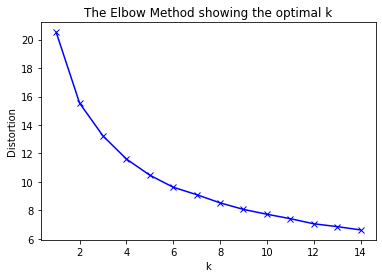

In [54]:
# clustering dataset
# determine k using elbow method for 400 test data 

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# create new plot and data
plt.plot()
X = np.array(list(zip(X_train.ravel(),X_test.ravel())))
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##### from the plot elbow indicats that the optimal k for this dataset is 4
#####The location of a bend (knee) in the plot is generally considered as an indicator of 
#####the appropriate number of clusters.

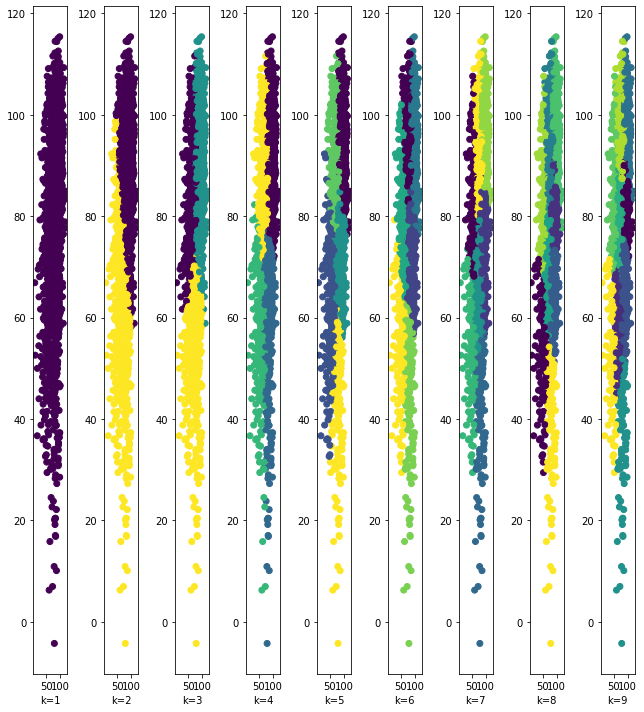

In [58]:
#####gap statics method k means cluster python code for determining the K numbers 
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

X = np.array(list(zip(X_train.ravel(),X_test.ravel())))
plt.figure(figsize=(10,10))
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    a = kmeans.fit_predict(X)
    plt.subplot(1,10,k)
    plt.scatter(X[:, 0], X[:, 1], c=a)
    plt.xlabel('k='+str(k))
plt.tight_layout()
plt.show()

both methods to help us determine number of clusters.based on elow method we have k=10, and also I have 10 Category so k=10

apply Kmeans cluster for different k.

to observe the behaviour of our model we can either alter the features , the cluster (k) numbers.or the K-means parameters:‘k-means++’, ‘random’ or n_init, 
since we decided the K by using the elbow method then K=10


In [77]:
from sklearn.metrics import confusion_matrix 
from sklearn.cluster import KMeans

# start with the parameter k-means++ , with k= 10 ,n-init=10 with energy feature


def find_clusters(parameter, n_clusters,max_iter,n_init,X,Y):
    
    kmeans = KMeans(init=parameter, n_clusters=n_clusters,max_iter = max_iter, n_init=n_init)
    kmeans.fit(X)  
    labels = kmeans.labels_
    centers=kmeans.cluster_centers_
    labelsPre =kmeans.fit_predict(Y)
    
    print(labels )
    print(labelsPre)
   
    return kmeans,centers, labels,labelsPre

[2 8 1 1 0 0 5 7 5 7 7 1 4 4 5 2 6 2 1 7 4 1 1 8 2 3 9 5 9 1 8 1 3 1 5 6 1
 3 2 1 1 1 5 1 1 5 1 5 1 8 1 1 6 8 9 6 6 1 2 7 8 1 1 9 3 1 8 7 6 1 1 5 9 9
 6 2 0 9 9 9 1 4 9 1 6 9 4 0 5 1 9 2 3 4 1 5 3 1 5 3 9 6 7 6 2 1 1 5 9 4 3
 5 1 1 1 4 1 8 5 8 3 1 9 5 5 3 1 7 5 6 1 1 9 4 0 0 5 6 9 1 9 1 3 1 2 7 1 9
 9 9 1 9 5 0 2 4 1 4 1 7 1 1 1 4 7 5 2 1 1 2 9 6 5 0 3 3 2 5 6 7 1 4 1 8 8
 9 3 1 7 7 1 6 3 1 5 4 1 4 6 0 9 8 1 1 1 3 5 1 6 7 1 6 7 5 9 2 1 3 5 8 1 1
 6 9 2 4 9 6 5 1 7 1 9 1 6 4 1 5 3 0 1 8 9 7 7 2 9 1 6 4 9 3 5 9 9 4 5 1 0
 8 6 5 1 4 1 5 1 5 6 2 8 0 1 1 4 5 1 2 8 5 9 0 9 7 7 0 3 1 1 9 9 1 8 4 1 1
 6 1 9 5]
[0 3 4 1 6 6 6 0 6 6 4 0 2 9 3 4 6 4 9 7 6 9 4 2 2 1 6 6 4 6 0 4 4 1 6 2 6
 2 6 8 1 0 6 5 2 0 1 8 2 2 6 6 2 3 7 9 4 4 4 6 3 0 6 2 3 3 7 6 3 2 6 2 0 0
 0 3 9 1 4 4 3 1 0 6 9 1 1 1 2 7 7 2 1 6 2 0 1 7 6 2]


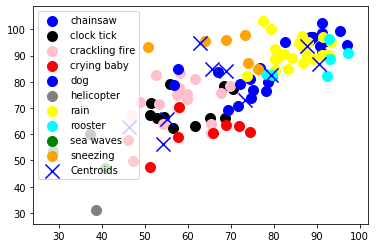

In [83]:
#### energy feature
kmeans,centers, labels,labelsPre = find_clusters('k-means++',10,300,10,X_train[:,0:12],X_test[:,0:6])

c=['b','black','pink','red','blue','gray','yellow','aqua','green','orange']
#Visualising the clusters
for k in range(10):
    plt.scatter(X_test[labelsPre == k,0],X_test[labelsPre == k,1], s = 100, c = c[k], label = y_test1[k])
    #Plotting the centroids of the clusters
plt.scatter(centers[:, 0], centers[:,1],marker='x', s = 200, c = 'b', label = 'Centroids')

plt.legend()

              precision    recall  f1-score   support

           0     0.7500    0.6923    0.7200        13
           1     0.5833    0.5833    0.5833        12
           2     0.0625    0.1000    0.0769        10
           3     0.0000    0.0000    0.0000         6
           4     0.0769    0.1111    0.0909         9
           5     0.0000    0.0000    0.0000        10
           6     0.1739    0.3333    0.2286        12
           7     0.1667    0.0769    0.1053        13
           8     0.0000    0.0000    0.0000         7
           9     0.0000    0.0000    0.0000         8

    accuracy                         0.2300       100
   macro avg     0.1813    0.1897    0.1805       100
weighted avg     0.2232    0.2300    0.2206       100

0.23


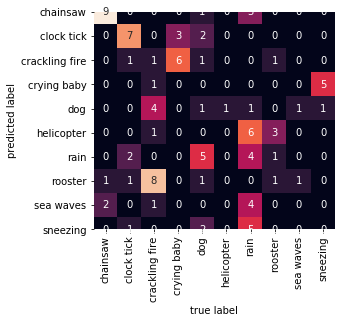

In [84]:
from sklearn.metrics import classification_report


sk_report = classification_report(
    digits=4,
    y_true=y_test_labels, 
    y_pred=labelsPre)
print(sk_report)

from sklearn.metrics import accuracy_score
print(accuracy_score(labelsPre, y_test_labels))
import seaborn as sns

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(labelsPre, y_test_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y_test1,
            yticklabels=y_test1)
plt.xlabel('true label')
plt.ylabel('predicted label');

[6 1 0 0 8 8 7 9 7 9 9 0 4 4 0 6 3 6 0 9 4 0 0 1 6 5 2 7 2 0 1 0 5 0 7 7 0
 5 6 0 0 0 7 0 0 7 0 7 0 3 0 0 3 1 4 3 3 0 6 9 7 0 0 4 5 0 1 9 3 0 0 7 2 2
 3 6 8 4 2 4 0 4 4 0 3 4 4 8 7 0 2 6 4 4 0 7 5 0 0 5 4 3 9 3 6 0 0 2 2 4 5
 2 0 0 0 1 0 1 0 1 5 0 9 7 7 5 0 9 0 3 2 0 2 4 8 8 7 3 2 0 4 0 5 0 6 9 0 4
 4 4 0 2 7 1 6 4 2 4 0 9 2 0 0 4 9 7 6 0 0 6 4 3 7 8 5 5 6 7 3 9 0 7 0 7 1
 2 5 0 9 9 2 3 5 2 2 4 0 4 3 8 2 1 0 2 0 5 7 0 3 9 0 3 9 7 4 6 0 5 7 1 0 0
 3 2 6 4 2 3 7 0 9 2 2 0 3 4 0 0 5 1 0 1 4 9 9 6 4 0 3 4 2 5 7 2 2 4 7 0 8
 1 3 7 2 4 2 7 2 7 3 6 1 8 0 0 7 7 0 6 1 7 2 8 2 9 9 8 5 0 0 2 2 0 1 4 0 0
 3 0 4 7]
[9 7 5 1 0 6 5 9 4 9 6 9 2 9 1 9 0 9 2 8 0 9 9 4 5 5 0 0 9 5 0 1 9 2 5 6 9
 6 0 2 7 9 8 3 6 0 2 4 4 6 0 9 6 1 8 9 1 9 6 0 1 9 8 6 1 7 8 8 1 6 8 6 0 0
 0 1 6 2 2 9 2 1 0 0 5 2 1 1 2 8 8 6 2 8 1 0 1 5 0 6]


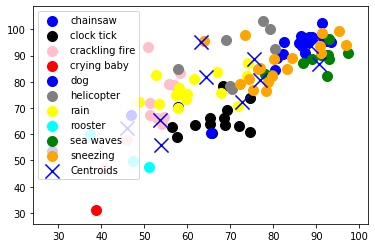

In [116]:
#### pulse feature
kmeans,centers, labels,labelsPre = find_clusters('k-means++',10,300,20,X_train[:,0:12],X_test[:,6:12])


#Visualising the clusters
c=['b','black','pink','red','blue','gray','yellow','aqua','green','orange']
#Visualising the clusters
for k in range(10):
    plt.scatter(X_test[labelsPre == k,0],X_test[labelsPre == k,1], s = 100, c = c[k], label = y_test1[k])
    #Plotting the centroids of the clusters
plt.scatter(centers[:, 0], centers[:,1],marker='x', s = 200, c = 'b', label = 'Centroids')

plt.legend()

              precision    recall  f1-score   support

           0     0.3529    0.4615    0.4000        13
           1     0.2143    0.2500    0.2308        12
           2     0.0909    0.1000    0.0952        10
           3     0.0000    0.0000    0.0000         6
           4     0.0000    0.0000    0.0000         9
           5     0.0000    0.0000    0.0000        10
           6     0.0000    0.0000    0.0000        12
           7     0.0000    0.0000    0.0000        13
           8     0.0000    0.0000    0.0000         7
           9     0.0556    0.1250    0.0769         8

    accuracy                         0.1100       100
   macro avg     0.0714    0.0937    0.0803       100
weighted avg     0.0851    0.1100    0.0954       100

0.11


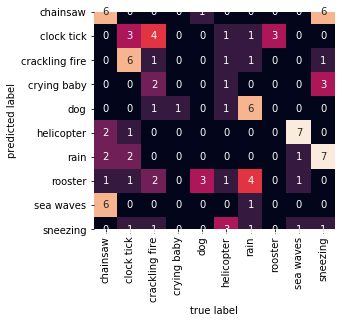

In [117]:
from sklearn.metrics import classification_report


sk_report = classification_report(
    digits=4,
    y_true=y_test_labels, 
    y_pred=labelsPre)
print(sk_report)

from sklearn.metrics import accuracy_score
print(accuracy_score(labelsPre, y_test_labels))
import seaborn as sns

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(labelsPre, y_test_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y_test1,
            yticklabels=y_test1)
plt.xlabel('true label')
plt.ylabel('predicted label');

[2 1 5 5 1 7 9 3 9 3 3 0 3 4 5 6 6 2 5 3 3 5 0 9 2 8 0 9 0 5 1 5 8 5 9 9 5
 8 2 0 5 0 9 5 5 5 5 5 5 7 5 5 6 1 9 6 6 5 2 3 9 5 5 4 8 5 1 3 2 5 5 9 4 3
 1 6 1 4 4 4 5 5 4 5 7 4 9 7 9 5 3 2 8 4 5 2 8 5 2 8 4 6 3 6 6 5 5 5 0 9 8
 9 5 5 5 8 0 1 5 9 8 5 0 5 5 4 5 3 5 6 0 5 5 9 1 7 9 7 4 5 4 5 8 5 2 0 5 4
 8 0 5 0 9 1 2 0 0 0 5 0 5 5 5 5 3 6 6 5 5 2 0 6 9 7 4 8 2 9 6 3 5 9 5 9 9
 5 4 5 0 3 5 6 9 5 5 4 5 4 6 7 0 7 5 5 5 8 2 5 6 0 5 1 0 9 0 2 5 8 9 1 5 5
 1 5 2 4 4 6 9 5 3 5 0 5 6 3 5 5 4 1 5 1 4 3 3 2 4 5 6 4 5 8 9 0 0 4 9 5 1
 1 1 9 5 9 5 5 3 2 6 2 1 7 5 5 9 9 5 2 1 5 5 1 5 0 3 1 8 5 5 9 0 5 1 9 5 5
 6 5 4 2]
[3 2 9 9 3 0 6 3 6 3 0 3 0 7 2 6 6 5 7 5 6 7 5 4 0 5 6 6 6 6 3 9 5 8 6 0 6
 4 6 8 8 3 6 1 0 3 8 4 4 0 6 6 4 2 5 7 0 6 6 6 2 3 6 4 2 2 5 6 9 0 6 4 6 3
 6 2 0 9 7 6 2 9 3 6 7 8 9 9 4 5 5 4 9 6 0 3 9 5 6 0]


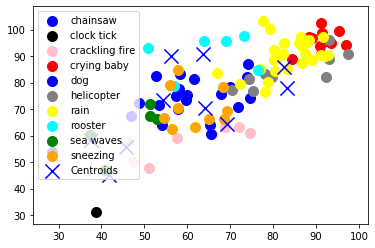

In [120]:
### tone energy

kmeans,centers, labels,labelsPre = find_clusters('k-means++',10,300,20,X_train[:,12:23],X_test[:,12:18])

#Visualising the clusters
c=['b','black','pink','red','blue','gray','yellow','aqua','green','orange']
#Visualising the clusters
for k in range(10):
    plt.scatter(X_test[labelsPre == k,0],X_test[labelsPre == k,1], s = 100, c = c[k], label = y_test1[k])
    #Plotting the centroids of the clusters
plt.scatter(centers[:, 0], centers[:,1],marker='x', s = 200, c = 'b', label = 'Centroids')

plt.legend()

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        13
           1     0.0000    0.0000    0.0000        12
           2     0.7500    0.6000    0.6667        10
           3     0.0000    0.0000    0.0000         6
           4     0.0000    0.0000    0.0000         9
           5     0.3000    0.3000    0.3000        10
           6     0.2963    0.6667    0.4103        12
           7     0.0000    0.0000    0.0000        13
           8     0.0000    0.0000    0.0000         7
           9     0.2000    0.2500    0.2222         8

    accuracy                         0.1900       100
   macro avg     0.1546    0.1817    0.1599       100
weighted avg     0.1566    0.1900    0.1637       100

0.19


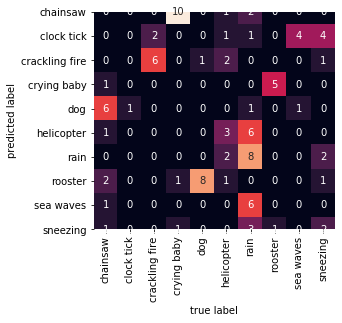

In [121]:
from sklearn.metrics import classification_report


sk_report = classification_report(
    digits=4,
    y_true=y_test_labels, 
    y_pred=labelsPre)
print(sk_report)

from sklearn.metrics import accuracy_score
print(accuracy_score(labelsPre, y_test_labels))
import seaborn as sns

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(labelsPre, y_test_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y_test1,
            yticklabels=y_test1)
plt.xlabel('true label')
plt.ylabel('predicted label');

[5 7 0 3 1 9 2 8 2 8 8 3 8 4 0 5 1 5 3 8 0 3 3 2 5 6 4 2 4 3 7 3 6 3 2 2 0
 6 5 3 3 3 2 0 3 0 0 3 0 9 3 3 1 7 2 1 1 3 5 8 2 3 3 4 6 0 7 8 5 0 3 2 4 0
 1 5 7 4 4 4 0 3 4 0 9 4 2 9 2 0 0 5 6 4 3 2 6 3 0 6 4 1 8 1 5 3 3 0 4 2 6
 0 3 0 3 6 3 7 3 2 6 0 8 0 0 4 0 8 0 1 4 3 0 2 7 9 2 9 4 3 4 3 6 3 5 8 3 4
 6 4 3 4 2 7 5 4 0 4 3 8 0 3 3 3 8 1 5 3 3 5 8 1 0 9 4 6 5 2 1 8 3 2 3 2 2
 0 4 3 8 8 3 1 2 0 3 4 3 6 1 9 4 9 0 0 0 6 2 0 1 8 3 1 8 2 4 5 3 6 0 7 3 0
 1 3 5 4 4 1 2 3 8 0 4 3 1 8 3 0 6 7 0 7 4 8 8 5 4 3 1 4 0 6 2 4 4 4 2 3 7
 7 1 2 3 2 0 0 0 5 1 5 7 9 3 3 2 2 3 5 7 0 0 7 0 8 8 1 6 3 3 0 8 3 7 2 0 3
 1 0 4 0]
[5 9 4 1 5 2 5 5 2 2 2 5 4 2 6 2 5 2 4 3 7 2 2 8 2 1 5 7 2 2 5 2 3 4 5 8 7
 8 5 0 0 5 7 9 8 5 4 8 8 8 5 7 8 6 3 2 2 2 2 7 6 5 7 8 6 9 3 7 6 8 7 8 5 5
 5 6 5 1 4 2 6 1 5 5 2 0 1 1 8 3 3 8 1 7 4 5 1 3 5 8]


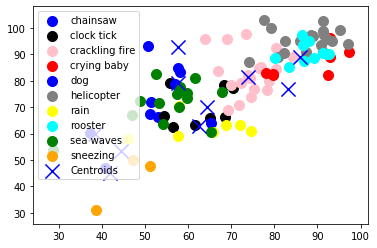

In [124]:
#### noise feature
kmeans,centers, labels,labelsPre = find_clusters('random',10,300,20,X_train[:,12:23],X_test[:,18:23])
 

#Visualising the clusters
c=['b','black','pink','red','blue','gray','yellow','aqua','green','orange']
#Visualising the clusters
for k in range(10):
    plt.scatter(X_test[labelsPre == k,0],X_test[labelsPre == k,1], s = 100, c = c[k], label = y_test1[k])
    #Plotting the centroids of the clusters
plt.scatter(centers[:, 0], centers[:,1],marker='x', s = 200, c = 'b', label = 'Centroids')

plt.legend()

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        13
           1     0.3750    0.2500    0.3000        12
           2     0.0526    0.1000    0.0690        10
           3     0.0000    0.0000    0.0000         6
           4     0.0000    0.0000    0.0000         9
           5     0.0455    0.1000    0.0625        10
           6     0.0000    0.0000    0.0000        12
           7     0.0000    0.0000    0.0000        13
           8     0.0714    0.1429    0.0952         7
           9     0.0000    0.0000    0.0000         8

    accuracy                         0.0600       100
   macro avg     0.0545    0.0593    0.0527       100
weighted avg     0.0598    0.0600    0.0558       100

0.06


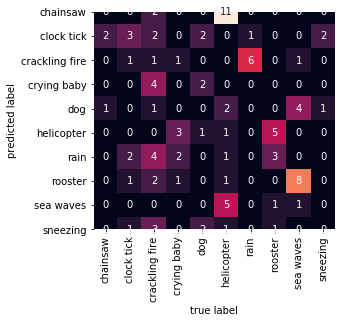

In [125]:
from sklearn.metrics import classification_report


sk_report = classification_report(
    digits=4,
    y_true=y_test_labels, 
    y_pred=labelsPre)
print(sk_report)

from sklearn.metrics import accuracy_score
print(accuracy_score(labelsPre, y_test_labels))
import seaborn as sns

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(labelsPre, y_test_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y_test1,
            yticklabels=y_test1)
plt.xlabel('true label')
plt.ylabel('predicted label');

[1 6 4 7 9 9 2 8 2 8 8 7 3 3 2 1 5 1 7 8 0 7 4 5 1 6 0 2 0 4 5 7 6 7 2 5 4
 3 1 7 4 4 2 7 7 2 7 2 7 5 4 7 5 9 0 5 5 7 1 8 2 7 7 3 3 7 6 8 5 4 4 2 0 0
 5 1 9 3 0 3 4 0 3 7 5 3 0 9 2 4 0 1 3 3 4 2 6 7 7 3 0 5 8 5 1 7 7 2 0 3 6
 2 7 7 4 6 4 6 2 5 3 7 0 2 2 3 7 8 7 5 4 7 4 2 9 9 2 5 0 7 3 7 6 7 1 8 7 3
 3 0 7 0 2 9 1 0 4 3 7 8 4 7 4 0 8 2 1 7 7 1 0 5 2 9 3 6 1 2 5 8 7 2 4 2 5
 4 3 7 8 8 4 5 3 4 0 3 4 3 5 9 0 5 7 4 7 6 2 4 5 8 4 5 8 2 0 1 7 6 2 6 4 7
 5 4 1 3 4 5 2 7 8 4 0 7 5 8 7 7 3 9 7 6 3 8 8 1 3 7 5 2 0 6 2 4 0 3 2 7 9
 6 5 2 4 2 4 2 4 2 5 1 5 9 7 4 2 2 4 1 6 2 4 9 0 8 8 9 3 7 4 0 0 7 5 3 7 7
 5 7 3 2]
[7 9 4 6 0 4 4 7 1 2 4 7 2 4 6 7 0 4 6 5 0 4 7 1 2 2 0 0 7 4 0 2 5 4 0 4 7
 4 0 1 3 7 5 8 4 7 1 1 4 4 0 7 4 2 5 7 2 7 4 0 2 7 5 4 2 9 5 5 6 4 5 4 0 7
 0 6 4 6 1 7 6 6 0 0 4 6 6 6 1 5 5 4 6 5 2 7 2 2 0 4]


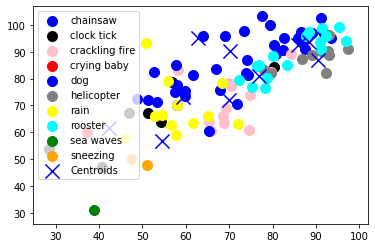

In [128]:
#### change the para to random
#### pulse feature
kmeans,centers, labels,labelsPre = find_clusters('random',10,300,20,X_train[:,0:12],X_test[:,6:12])

#Visualising the clusters
c=['b','black','pink','red','blue','gray','yellow','aqua','green','orange']
#Visualising the clusters
for k in range(10):
    plt.scatter(X_test[labelsPre == k,0],X_test[labelsPre == k,1], s = 100, c = c[k], label = y_test1[k])
    #Plotting the centroids of the clusters
plt.scatter(centers[:, 0], centers[:,1],marker='x', s = 200, c = 'b', label = 'Centroids')

plt.legend()

              precision    recall  f1-score   support

           0     0.2667    0.3077    0.2857        13
           1     0.1429    0.0833    0.1053        12
           2     0.3333    0.4000    0.3636        10
           3     0.0000    0.0000    0.0000         6
           4     0.2609    0.6667    0.3750         9
           5     0.6364    0.7000    0.6667        10
           6     0.0833    0.0833    0.0833        12
           7     0.0625    0.0769    0.0690        13
           8     0.0000    0.0000    0.0000         7
           9     0.0000    0.0000    0.0000         8

    accuracy                         0.2400       100
   macro avg     0.1786    0.2318    0.1949       100
weighted avg     0.1904    0.2400    0.2055       100

0.24


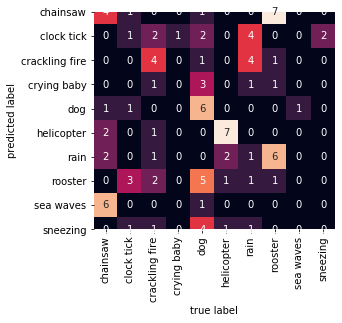

In [129]:

sk_report = classification_report(
    digits=4,
    y_true=y_test_labels, 
    y_pred=labelsPre)
print(sk_report)


print(accuracy_score(labelsPre, y_test_labels))

mat = confusion_matrix(labelsPre, y_test_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y_test1,
            yticklabels=y_test1)
plt.xlabel('true label')
plt.ylabel('predicted label');

[3 7 1 1 7 5 4 9 3 9 9 6 4 8 1 0 0 3 1 9 4 1 6 7 3 2 6 4 6 1 7 1 2 1 4 3 1
 2 3 6 1 6 4 1 1 1 1 1 1 5 1 1 0 7 4 0 0 1 3 9 4 1 1 8 2 1 7 9 3 1 1 4 8 4
 7 0 7 8 8 8 1 1 8 1 5 8 4 5 4 1 4 3 2 8 1 3 2 1 3 2 8 0 9 0 0 1 1 4 6 4 2
 4 1 1 1 2 6 7 1 4 2 1 6 3 1 8 1 9 1 0 6 1 1 4 7 5 4 5 8 1 8 1 2 1 3 6 1 8
 2 8 1 8 3 7 3 6 6 8 1 6 1 1 1 1 6 0 0 1 1 3 6 0 4 5 8 2 3 7 7 9 1 4 1 4 4
 1 8 1 6 9 1 0 4 1 1 8 1 2 0 5 8 5 1 1 1 2 3 1 0 6 1 7 6 3 6 3 1 2 4 7 1 1
 7 1 3 8 8 0 3 1 9 1 6 1 0 9 1 1 8 7 1 7 8 9 9 3 8 1 0 8 1 2 3 6 6 8 4 1 7
 7 7 4 1 4 1 1 4 3 0 3 7 5 1 1 4 3 1 3 7 1 1 7 1 6 9 7 2 1 1 4 6 1 7 4 1 1
 0 1 8 3]
[0 3 8 8 0 9 2 0 2 0 8 0 9 7 3 2 2 8 7 6 2 7 8 4 9 8 2 2 8 2 0 1 8 1 2 9 2
 4 2 4 1 0 2 5 9 0 1 4 4 9 2 2 4 3 6 7 7 8 8 2 3 0 2 4 3 3 6 2 1 9 2 4 2 0
 2 3 9 1 7 8 3 8 0 2 7 1 1 1 4 6 6 4 1 2 4 0 1 6 2 9]


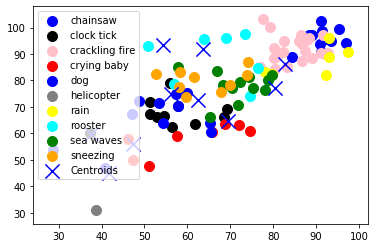

In [130]:
#### change the para to k-means++
### tone energy

kmeans,centers, labels,labelsPre = find_clusters('random',10,300,20,X_train[:,12:23],X_test[:,12:18])

#Visualising the clusters
c=['b','black','pink','red','blue','gray','yellow','aqua','green','orange']
#Visualising the clusters
for k in range(10):
    plt.scatter(X_test[labelsPre == k,0],X_test[labelsPre == k,1], s = 100, c = c[k], label = y_test1[k])
    #Plotting the centroids of the clusters
plt.scatter(centers[:, 0], centers[:,1],marker='x', s = 200, c = 'b', label = 'Centroids')

plt.legend()

              precision    recall  f1-score   support

           0     0.8333    0.7692    0.8000        13
           1     0.6364    0.5833    0.6087        12
           2     0.0000    0.0000    0.0000        10
           3     0.0000    0.0000    0.0000         6
           4     0.0909    0.1111    0.1000         9
           5     0.0000    0.0000    0.0000        10
           6     0.1667    0.0833    0.1111        12
           7     0.1429    0.0769    0.1000        13
           8     0.0000    0.0000    0.0000         7
           9     0.1111    0.1250    0.1176         8

    accuracy                         0.2100       100
   macro avg     0.1981    0.1749    0.1837       100
weighted avg     0.2403    0.2100    0.2218       100

0.21


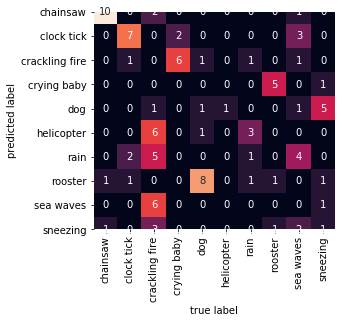

In [131]:


sk_report = classification_report(
    digits=4,
    y_true=y_test_labels, 
    y_pred=labelsPre)
print(sk_report)


print(accuracy_score(labelsPre, y_test_labels))

mat = confusion_matrix(labelsPre, y_test_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y_test1,
            yticklabels=y_test1)
plt.xlabel('true label')
plt.ylabel('predicted label');

[0 3 4 4 3 7 9 1 9 1 1 8 1 6 4 5 5 0 8 1 1 8 8 9 0 6 2 9 2 8 3 8 6 4 9 9 4
 6 0 8 4 8 9 4 4 4 4 4 4 7 8 8 5 3 9 5 5 8 0 1 9 4 4 2 6 4 3 1 0 4 4 9 2 4
 3 5 3 2 2 2 4 8 2 4 7 2 9 7 9 4 1 0 6 2 8 0 6 4 4 6 2 5 1 5 5 4 8 4 2 9 6
 9 4 4 8 6 8 3 4 9 6 4 2 4 4 2 4 1 4 5 2 8 4 9 3 7 9 7 2 8 2 8 6 8 0 1 8 2
 6 2 4 2 9 3 0 2 4 2 8 1 4 4 8 8 1 5 5 8 8 0 1 5 4 7 2 6 0 9 5 1 4 9 8 9 9
 4 6 4 2 1 8 5 9 4 8 2 8 6 5 7 2 7 4 4 4 6 0 4 5 1 8 5 1 9 2 0 8 6 9 3 8 4
 3 8 0 2 2 5 9 4 1 4 2 8 5 1 8 4 6 3 4 3 2 1 1 0 2 4 5 2 8 6 9 2 2 2 9 8 3
 3 3 9 8 9 4 4 4 0 5 0 3 7 4 8 9 9 4 0 3 4 4 3 4 2 1 3 6 8 8 4 2 4 3 9 4 8
 5 4 2 4]
[1 2 5 0 1 5 1 1 5 5 5 1 0 5 4 5 1 3 8 7 1 5 3 8 5 3 1 1 3 3 1 3 3 0 1 6 1
 8 1 0 0 1 7 9 6 1 0 8 8 6 1 1 8 4 7 5 3 5 3 1 4 1 7 6 4 2 3 7 4 6 7 6 1 1
 1 4 1 0 8 5 2 3 1 1 5 0 4 0 8 7 7 8 0 7 8 1 4 3 1 6]


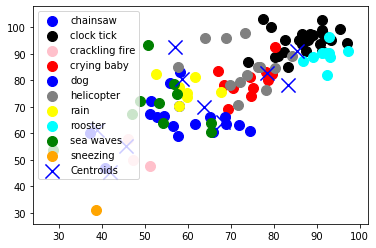

In [132]:
#### change the para to k-means ++
#### noise feature
kmeans,centers, labels,labelsPre = find_clusters('k-means++',10,300,20,X_train[:,12:23],X_test[:,18:23])
 
#Visualising the clusters
c=['b','black','pink','red','blue','gray','yellow','aqua','green','orange']
#Visualising the clusters
for k in range(10):
    plt.scatter(X_test[labelsPre == k,0],X_test[labelsPre == k,1], s = 100, c = c[k], label = y_test1[k])
    #Plotting the centroids of the clusters
plt.scatter(centers[:, 0], centers[:,1],marker='x', s = 200, c = 'b', label = 'Centroids')

plt.legend()

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        13
           1     0.0000    0.0000    0.0000        12
           2     0.3333    0.1000    0.1538        10
           3     0.0000    0.0000    0.0000         6
           4     0.0000    0.0000    0.0000         9
           5     0.0000    0.0000    0.0000        10
           6     0.0000    0.0000    0.0000        12
           7     0.1111    0.0769    0.0909        13
           8     0.0000    0.0000    0.0000         7
           9     0.0000    0.0000    0.0000         8

    accuracy                         0.0200       100
   macro avg     0.0444    0.0177    0.0245       100
weighted avg     0.0478    0.0200    0.0272       100

0.02


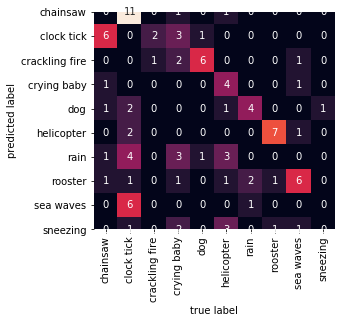

In [133]:
sk_report = classification_report(
    digits=4,
    y_true=y_test_labels, 
    y_pred=labelsPre)
print(sk_report)


print(accuracy_score(labelsPre, y_test_labels))

mat = confusion_matrix(labelsPre, y_test_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y_test1,
            yticklabels=y_test1)
plt.xlabel('true label')
plt.ylabel('predicted label');

[4 9 6 7 0 0 8 3 8 3 3 7 1 1 6 4 5 4 7 3 1 7 7 5 4 9 6 8 6 6 5 7 9 7 8 8 6
 9 4 7 6 7 8 7 7 8 7 6 6 5 6 7 5 0 1 5 4 7 4 3 8 7 7 2 9 7 9 3 5 7 6 8 2 6
 5 4 0 2 2 2 6 1 2 6 5 2 1 0 8 6 6 4 2 1 6 4 9 7 4 2 2 5 3 5 4 7 7 6 2 1 9
 6 7 7 6 1 7 9 6 1 9 7 3 6 8 2 7 3 6 5 6 7 6 1 0 0 8 5 2 7 2 7 9 7 4 3 7 2
 2 2 7 2 8 0 4 1 6 1 7 3 6 7 7 1 3 8 4 7 7 4 1 5 6 0 2 9 4 8 5 3 7 1 7 8 5
 6 2 7 3 3 6 5 2 6 6 1 7 1 5 0 2 5 6 6 7 9 8 6 5 3 7 5 3 8 1 4 7 9 8 9 6 6
 5 6 4 1 6 5 8 7 3 6 6 7 5 1 7 6 2 0 7 9 2 3 3 4 2 7 5 1 6 9 8 6 2 1 8 7 0
 9 5 8 6 8 6 3 6 8 5 4 5 0 7 6 8 8 6 4 9 3 6 0 6 3 3 0 2 7 6 6 2 7 5 1 7 7
 5 7 2 4]
[7 4 1 6 7 9 3 7 1 7 1 7 9 5 2 1 3 1 5 0 3 5 1 8 9 6 7 3 1 1 7 6 1 6 3 9 1
 8 3 6 6 7 3 4 9 7 6 8 8 9 3 1 8 2 0 5 1 1 1 3 2 7 3 8 2 2 0 3 2 9 3 9 7 7
 7 2 9 6 8 1 2 6 7 7 5 6 2 6 8 0 0 8 6 3 8 7 6 0 7 9]


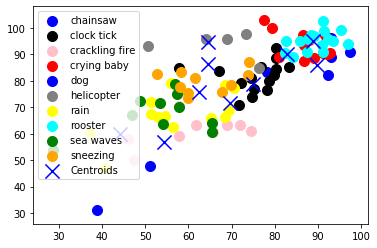

In [160]:
#### changing the parameter to random
#### energy feature 10,200,25
kmeans,centers, labels,labelsPre = find_clusters('random',10,200,25,X_train[:,0:12],X_test[:,0:6])
#Visualising the clusters
c=['b','black','pink','red','blue','gray','yellow','aqua','green','orange']
#Visualising the clusters
for k in range(10):
    plt.scatter(X_test[labelsPre == k,0],X_test[labelsPre == k,1], s = 100, c = c[k], label = y_test1[k])
    #Plotting the centroids of the clusters
plt.scatter(centers[:, 0], centers[:,1],marker='x', s = 200, c = 'b', label = 'Centroids')

plt.legend()

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        13
           1     0.0667    0.0833    0.0741        12
           2     0.7778    0.7000    0.7368        10
           3     0.0000    0.0000    0.0000         6
           4     0.5000    0.1111    0.1818         9
           5     0.0000    0.0000    0.0000        10
           6     0.1538    0.1667    0.1600        12
           7     0.0588    0.0769    0.0667        13
           8     0.0000    0.0000    0.0000         7
           9     0.1000    0.1250    0.1111         8

    accuracy                         0.1300       100
   macro avg     0.1657    0.1263    0.1331       100
weighted avg     0.1649    0.1300    0.1357       100

0.13


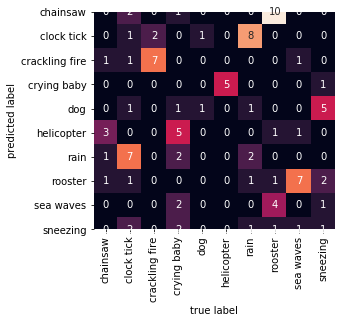

In [161]:

sk_report = classification_report(
    digits=4,
    y_true=y_test_labels, 
    y_pred=labelsPre)
print(sk_report)


print(accuracy_score(labelsPre, y_test_labels))

mat = confusion_matrix(labelsPre, y_test_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y_test1,
            yticklabels=y_test1)
plt.xlabel('true label')
plt.ylabel('predicted label');

[0 4 2 8 1 1 5 9 5 9 9 8 7 7 5 0 3 0 8 9 7 8 8 3 0 4 2 5 2 2 7 8 4 8 7 7 2
 4 0 8 2 8 5 8 8 5 8 2 8 3 2 8 3 1 7 3 3 8 0 9 7 8 8 6 6 8 7 9 3 8 2 5 6 2
 3 0 1 6 6 6 8 6 6 8 3 6 7 1 7 2 2 0 6 7 2 5 4 8 5 6 6 3 9 3 0 8 8 2 6 7 4
 2 8 8 8 4 8 7 5 7 6 8 9 5 5 6 8 9 5 3 2 8 2 7 1 1 7 3 6 8 6 8 4 8 5 9 8 6
 6 6 8 2 7 1 0 9 2 9 8 9 2 8 8 9 9 5 0 8 8 0 9 3 5 1 6 4 0 5 3 9 8 7 8 7 7
 2 6 8 9 9 2 3 6 2 2 9 8 7 3 1 6 3 2 2 8 4 5 2 3 9 8 3 9 5 9 0 8 4 5 7 2 2
 3 2 0 7 2 3 5 8 9 2 2 8 3 9 8 5 6 1 8 4 6 9 9 0 6 8 3 7 2 4 5 2 2 6 5 8 1
 4 3 5 2 7 2 5 2 5 3 0 1 1 8 2 7 5 2 0 4 5 2 1 2 9 9 1 6 8 2 2 6 8 7 7 8 8
 3 8 6 5]
[7 9 6 1 4 4 4 7 4 4 6 7 5 2 3 6 4 6 2 0 4 2 6 5 5 6 4 4 6 4 7 6 6 1 4 5 4
 5 4 1 1 7 4 9 5 7 1 8 5 5 4 4 5 3 0 2 6 6 6 4 3 7 4 5 3 3 6 4 3 5 4 5 7 7
 7 3 2 1 5 6 3 6 7 4 2 1 3 1 5 0 0 5 1 4 5 7 1 0 4 5]


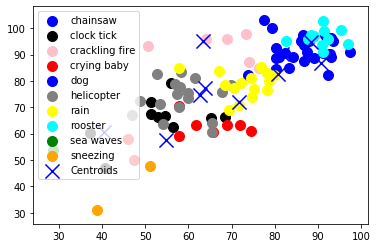

In [170]:

#### energy feature ,10,200,15 
kmeans,centers, labels,labelsPre = find_clusters('random',10,200,15,X_train[:,0:12],X_test[:,0:6])

#Visualising the clusters
c=['b','black','pink','red','blue','gray','yellow','aqua','green','orange']
#Visualising the clusters
for k in range(10):
    plt.scatter(X_test[labelsPre == k,0],X_test[labelsPre == k,1], s = 100, c = c[k], label = y_test1[k])
    #Plotting the centroids of the clusters
plt.scatter(centers[:, 0], centers[:,1],marker='x', s = 200, c = 'b', label = 'Centroids')

plt.legend()

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        13
           1     0.6000    0.5000    0.5455        12
           2     0.0000    0.0000    0.0000        10
           3     0.0000    0.0000    0.0000         6
           4     0.0435    0.1111    0.0625         9
           5     0.0588    0.1000    0.0741        10
           6     0.4000    0.5000    0.4444        12
           7     0.0833    0.0769    0.0800        13
           8     0.0000    0.0000    0.0000         7
           9     0.0000    0.0000    0.0000         8

    accuracy                         0.1500       100
   macro avg     0.1186    0.1288    0.1206       100
weighted avg     0.1406    0.1500    0.1422       100

0.15


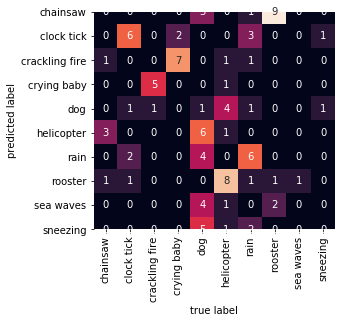

In [171]:

sk_report = classification_report(
    digits=4,
    y_true=y_test_labels, 
    y_pred=labelsPre)
print(sk_report)


print(accuracy_score(labelsPre, y_test_labels))

mat = confusion_matrix(labelsPre, y_test_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y_test1,
            yticklabels=y_test1)
plt.xlabel('true label')
plt.ylabel('predicted label');

applying support vector machine, or support vector regression
The accuracy score should change by changing the parameter C which defines the margine distance. 
to achieve the highest accuracy score which is equal 1,we need a bigger margine distance ,to do that by manibulating C parameter.
The highest accuracy when C=1, furthermore the accuracy drops while increasing the parameter C.


In [179]:
#parameter linear, C=100, gamma=2 ,degree 1
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=100,gamma=2,degree=1)
clf.fit(X_train,y_train) 
classifier_pred=clf.predict(X_test)

print(len(y_test))
print(len(classifier_pred))

i=0
for item in y_test:
    print(item,'=',classifier_pred[i])
    i+=1
    if i==100:
        break
    else:
        continue
    


100
100
chainsaw = chainsaw
clock_tick = crackling_fire
sneezing = clock_tick
clock_tick = clock_tick
chainsaw = sea_waves
sneezing = dog
sneezing = sneezing
chainsaw = chainsaw
chainsaw = chainsaw
sneezing = sneezing
dog = rooster
chainsaw = chainsaw
crying_baby = crying_baby
crying_baby = crying_baby
crackling_fire = crackling_fire
rain = rain
sea_waves = helicopter
chainsaw = sneezing
crying_baby = crying_baby
helicopter = helicopter
rain = sea_waves
crying_baby = crying_baby
crackling_fire = rain
rooster = dog
rooster = rooster
clock_tick = rain
sea_waves = sea_waves
helicopter = helicopter
rain = rain
sneezing = sneezing
chainsaw = chainsaw
clock_tick = clock_tick
rain = rain
clock_tick = clock_tick
dog = dog
dog = dog
rain = rain
rooster = rooster
rain = sea_waves
dog = rooster
clock_tick = clock_tick
chainsaw = chainsaw
helicopter = helicopter
dog = clock_tick
dog = dog
chainsaw = chainsaw
clock_tick = dog
rooster = dog
rooster = rooster
dog = dog
chainsaw = sea_waves
rain = sea

In [180]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)                                              
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

from sklearn import metrics

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
print(scores)

from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']


scores = cross_validate(clf, X_train, y_train, scoring=scoring,
                        cv=5)
print(sorted(scores.keys()))

scores['test_recall_macro']                       



[0.68253968 0.66129032 0.8        0.72413793 0.75438596]
Accuracy: 0.72 (+/- 0.10)
[0.67823954 0.66599817 0.79502165 0.71844156 0.74836053]
['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']


array([0.68809524, 0.66952381, 0.7947619 , 0.72571429, 0.75333333])

In [181]:

clf = SVC(kernel='poly', C=100,gamma=2,degree=1)
clf.fit(X_train,y_train) 
classifier_pred=clf.predict(X_test)

print(len(y_test))
print(len(classifier_pred))
 

i=0
for item in y_test:
    print(item,'=',classifier_pred[i])
    i+=1
    if i==100:
        break
    else:
        continue
    


100
100
chainsaw = chainsaw
clock_tick = crackling_fire
sneezing = clock_tick
clock_tick = clock_tick
chainsaw = sea_waves
sneezing = dog
sneezing = sneezing
chainsaw = chainsaw
chainsaw = chainsaw
sneezing = sneezing
dog = rooster
chainsaw = chainsaw
crying_baby = crying_baby
crying_baby = crying_baby
crackling_fire = crackling_fire
rain = rain
sea_waves = helicopter
chainsaw = sneezing
crying_baby = crying_baby
helicopter = helicopter
rain = sea_waves
crying_baby = crying_baby
crackling_fire = rain
rooster = dog
rooster = rooster
clock_tick = rain
sea_waves = sea_waves
helicopter = helicopter
rain = rain
sneezing = sneezing
chainsaw = chainsaw
clock_tick = clock_tick
rain = rain
clock_tick = clock_tick
dog = dog
dog = dog
rain = rain
rooster = rooster
rain = sea_waves
dog = rooster
clock_tick = clock_tick
chainsaw = chainsaw
helicopter = helicopter
dog = clock_tick
dog = dog
chainsaw = chainsaw
clock_tick = dog
rooster = dog
rooster = rooster
dog = dog
chainsaw = sea_waves
rain = sea

In [183]:


scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)                                              
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
print(scores)


scoring = ['precision_macro', 'recall_macro']


scores = cross_validate(clf, X_train, y_train, scoring=scoring,
                        cv=5)
print(sorted(scores.keys()))

scores['test_recall_macro']

[0.68253968 0.66129032 0.8        0.72413793 0.75438596]
Accuracy: 0.72 (+/- 0.10)
[0.67823954 0.66599817 0.79502165 0.71844156 0.74836053]
['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']


array([0.68809524, 0.66952381, 0.7947619 , 0.72571429, 0.75333333])

In [185]:
# rbf 
clf = SVC(kernel='rbf', C=100,gamma=2,degree=1)
clf.fit(X_train,y_train) 
classifier_pred=clf.predict(X_test)

print(len(y_test))
print(len(classifier_pred))

i=0
for item in y_test:
    print(item,'=',classifier_pred[i])
    i+=1
    if i==100:
        break
    else:
        continue
    


100
100
chainsaw = crying_baby
clock_tick = crying_baby
sneezing = crying_baby
clock_tick = crying_baby
chainsaw = crying_baby
sneezing = crying_baby
sneezing = crying_baby
chainsaw = crying_baby
chainsaw = crying_baby
sneezing = crying_baby
dog = crying_baby
chainsaw = crying_baby
crying_baby = crying_baby
crying_baby = crying_baby
crackling_fire = crying_baby
rain = crying_baby
sea_waves = crying_baby
chainsaw = crying_baby
crying_baby = crying_baby
helicopter = crying_baby
rain = crying_baby
crying_baby = crying_baby
crackling_fire = crying_baby
rooster = crying_baby
rooster = crying_baby
clock_tick = crying_baby
sea_waves = crying_baby
helicopter = crying_baby
rain = crying_baby
sneezing = crying_baby
chainsaw = crying_baby
clock_tick = crying_baby
rain = crying_baby
clock_tick = crying_baby
dog = crying_baby
dog = crying_baby
rain = crying_baby
rooster = crying_baby
rain = crying_baby
dog = crying_baby
clock_tick = crying_baby
chainsaw = crying_baby
helicopter = crying_baby
dog = 

In [186]:


scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)                                              
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
print(scores)


scoring = ['precision_macro', 'recall_macro']


scores = cross_validate(clf, X_train, y_train, scoring=scoring,
                        cv=5)
print(sorted(scores.keys()))

scores['test_recall_macro']

[0.11111111 0.11290323 0.11666667 0.12068966 0.10526316]
Accuracy: 0.11 (+/- 0.01)


/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/wkhalili/anaco

[0.02       0.02028986 0.02089552 0.02153846 0.01904762]


/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']


/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.1, 0.1, 0.1, 0.1, 0.1])

In [187]:
# linear
clf = SVC(kernel='linear', C=1,gamma=6,degree=2)
clf.fit(X_train,y_train) 
classifier_pred=clf.predict(X_test)

print(len(y_test))
print(len(classifier_pred))

i=0
for item in y_test:
    print(item,'=',classifier_pred[i])
    i+=1
    if i==100:
        break
    else:
        continue
    


100
100
chainsaw = chainsaw
clock_tick = crackling_fire
sneezing = clock_tick
clock_tick = clock_tick
chainsaw = sea_waves
sneezing = dog
sneezing = sneezing
chainsaw = chainsaw
chainsaw = chainsaw
sneezing = sneezing
dog = rooster
chainsaw = chainsaw
crying_baby = crying_baby
crying_baby = crying_baby
crackling_fire = crackling_fire
rain = rain
sea_waves = helicopter
chainsaw = sneezing
crying_baby = crying_baby
helicopter = helicopter
rain = helicopter
crying_baby = crying_baby
crackling_fire = rain
rooster = dog
rooster = rooster
clock_tick = rain
sea_waves = sea_waves
helicopter = helicopter
rain = rain
sneezing = sneezing
chainsaw = chainsaw
clock_tick = clock_tick
rain = rain
clock_tick = clock_tick
dog = dog
dog = dog
rain = rain
rooster = rooster
rain = sea_waves
dog = rooster
clock_tick = clock_tick
chainsaw = chainsaw
helicopter = helicopter
dog = clock_tick
dog = dog
chainsaw = chainsaw
clock_tick = dog
rooster = dog
rooster = rooster
dog = dog
chainsaw = sea_waves
rain = se

In [188]:


scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)                                              
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
print(scores)


scoring = ['precision_macro', 'recall_macro']


scores = cross_validate(clf, X_train, y_train, scoring=scoring,
                        cv=5)
print(sorted(scores.keys()))

scores['test_recall_macro']

[0.68253968 0.66129032 0.81666667 0.74137931 0.75438596]
Accuracy: 0.73 (+/- 0.11)
[0.67823954 0.66599817 0.81142524 0.73593074 0.74836053]
['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']


array([0.68809524, 0.66952381, 0.8147619 , 0.74238095, 0.75333333])

In [189]:
#parameter poly, C=1, gamma=6,degree 2

clf = SVC(kernel='poly', C=1,gamma=6,degree=2)
clf.fit(X_train,y_train) 
classifier_pred=clf.predict(X_test)

print(len(y_test))
print(len(classifier_pred))

i=0
for item in y_test:
    print(item,'=',classifier_pred[i])
    i+=1
    if i==100:
        break
    else:
        continue
    




scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)                                              
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
print(scores)


scoring = ['precision_macro', 'recall_macro']


scores = cross_validate(clf, X_train, y_train, scoring=scoring,
                        cv=5)
print(sorted(scores.keys()))

scores['test_recall_macro']

100
100
chainsaw = chainsaw
clock_tick = crackling_fire
sneezing = clock_tick
clock_tick = clock_tick
chainsaw = sea_waves
sneezing = dog
sneezing = sneezing
chainsaw = chainsaw
chainsaw = chainsaw
sneezing = sneezing
dog = rooster
chainsaw = chainsaw
crying_baby = crying_baby
crying_baby = crying_baby
crackling_fire = crackling_fire
rain = rain
sea_waves = sea_waves
chainsaw = sneezing
crying_baby = crying_baby
helicopter = helicopter
rain = sea_waves
crying_baby = crying_baby
crackling_fire = rain
rooster = dog
rooster = rooster
clock_tick = rain
sea_waves = sea_waves
helicopter = helicopter
rain = rain
sneezing = sneezing
chainsaw = chainsaw
clock_tick = clock_tick
rain = rain
clock_tick = clock_tick
dog = dog
dog = dog
rain = rain
rooster = rooster
rain = sea_waves
dog = rooster
clock_tick = clock_tick
chainsaw = chainsaw
helicopter = helicopter
dog = crackling_fire
dog = dog
chainsaw = chainsaw
clock_tick = dog
rooster = rooster
rooster = rooster
dog = dog
chainsaw = sea_waves
rai

array([0.7       , 0.68380952, 0.7947619 , 0.77904762, 0.78666667])

In [191]:
#parameter linear, C=1, gamma=1 ,degree 1

clf = SVC(kernel='rbf', C=1,gamma=6,degree=2)
clf.fit(X_train,y_train) 
classifier_pred=clf.predict(X_test)

print(len(y_test))
print(len(classifier_pred))

i=0
for item in y_test:
    print(item,'=',classifier_pred[i])
    i+=1
    if i==100:
        break
    else:
        continue
    

###### evaluating the SVM 


scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)                                              
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
print(scores)


scoring = ['precision_macro', 'recall_macro']


scores = cross_validate(clf, X_train, y_train, scoring=scoring,
                        cv=5)
print(sorted(scores.keys()))

scores['test_recall_macro']          



100
100
chainsaw = crying_baby
clock_tick = crying_baby
sneezing = crying_baby
clock_tick = crying_baby
chainsaw = crying_baby
sneezing = crying_baby
sneezing = crying_baby
chainsaw = crying_baby
chainsaw = crying_baby
sneezing = crying_baby
dog = crying_baby
chainsaw = crying_baby
crying_baby = crying_baby
crying_baby = crying_baby
crackling_fire = crying_baby
rain = crying_baby
sea_waves = crying_baby
chainsaw = crying_baby
crying_baby = crying_baby
helicopter = crying_baby
rain = crying_baby
crying_baby = crying_baby
crackling_fire = crying_baby
rooster = crying_baby
rooster = crying_baby
clock_tick = crying_baby
sea_waves = crying_baby
helicopter = crying_baby
rain = crying_baby
sneezing = crying_baby
chainsaw = crying_baby
clock_tick = crying_baby
rain = crying_baby
clock_tick = crying_baby
dog = crying_baby
dog = crying_baby
rain = crying_baby
rooster = crying_baby
rain = crying_baby
dog = crying_baby
clock_tick = crying_baby
chainsaw = crying_baby
helicopter = crying_baby
dog = 

/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/wkhalili/anaco

[0.02       0.02028986 0.02089552 0.01875    0.01904762]


/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']


/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/wkhalili/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.1, 0.1, 0.1, 0.1, 0.1])

In [192]:
#parameter linear, C=1000, gamma=0.0001 ,degree 1

clf = SVC(kernel='poly', C=1000,gamma=0.0001,degree=2)
clf.fit(X_train,y_train) 
classifier_pred=clf.predict(X_test)

print(len(y_test))
print(len(classifier_pred))

i=0
for item in y_test:
    print(item,'=',classifier_pred[i])
    i+=1
    if i==100:
        break
    else:
        continue
    




scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)                                              
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
print(scores)


scoring = ['precision_macro', 'recall_macro']


scores = cross_validate(clf, X_train, y_train, scoring=scoring,
                        cv=5)
print(sorted(scores.keys()))

scores['test_recall_macro']

100
100
chainsaw = chainsaw
clock_tick = crackling_fire
sneezing = clock_tick
clock_tick = clock_tick
chainsaw = sea_waves
sneezing = dog
sneezing = sneezing
chainsaw = chainsaw
chainsaw = chainsaw
sneezing = sneezing
dog = rooster
chainsaw = chainsaw
crying_baby = crying_baby
crying_baby = crying_baby
crackling_fire = crackling_fire
rain = rain
sea_waves = sea_waves
chainsaw = sneezing
crying_baby = crying_baby
helicopter = helicopter
rain = sea_waves
crying_baby = crying_baby
crackling_fire = rain
rooster = dog
rooster = rooster
clock_tick = rain
sea_waves = sea_waves
helicopter = helicopter
rain = rain
sneezing = sneezing
chainsaw = chainsaw
clock_tick = clock_tick
rain = rain
clock_tick = clock_tick
dog = dog
dog = dog
rain = rain
rooster = rooster
rain = sea_waves
dog = rooster
clock_tick = clock_tick
chainsaw = chainsaw
helicopter = helicopter
dog = crackling_fire
dog = dog
chainsaw = chainsaw
clock_tick = dog
rooster = rooster
rooster = rooster
dog = dog
chainsaw = sea_waves
rai

array([0.7       , 0.68380952, 0.7947619 , 0.77904762, 0.78666667])

applying hierarichal kolomogrov clustering, with different type of linkage(complete linkage,single linkage,average linkage) for 1600 files

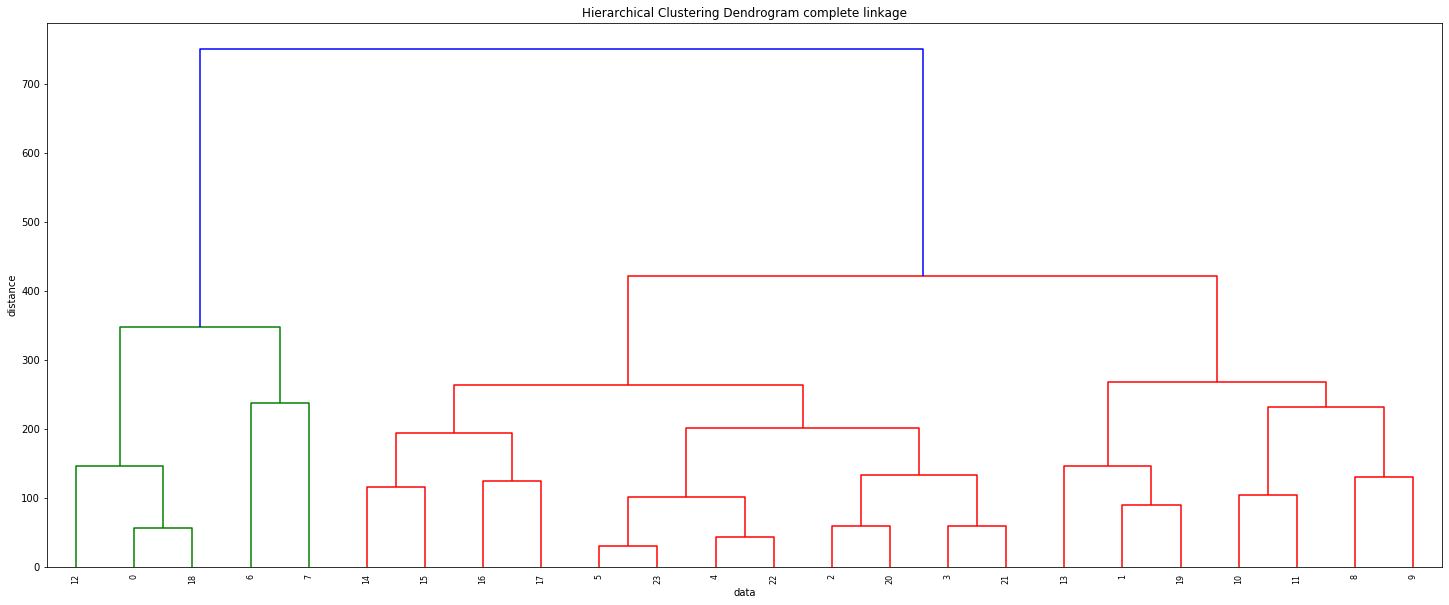

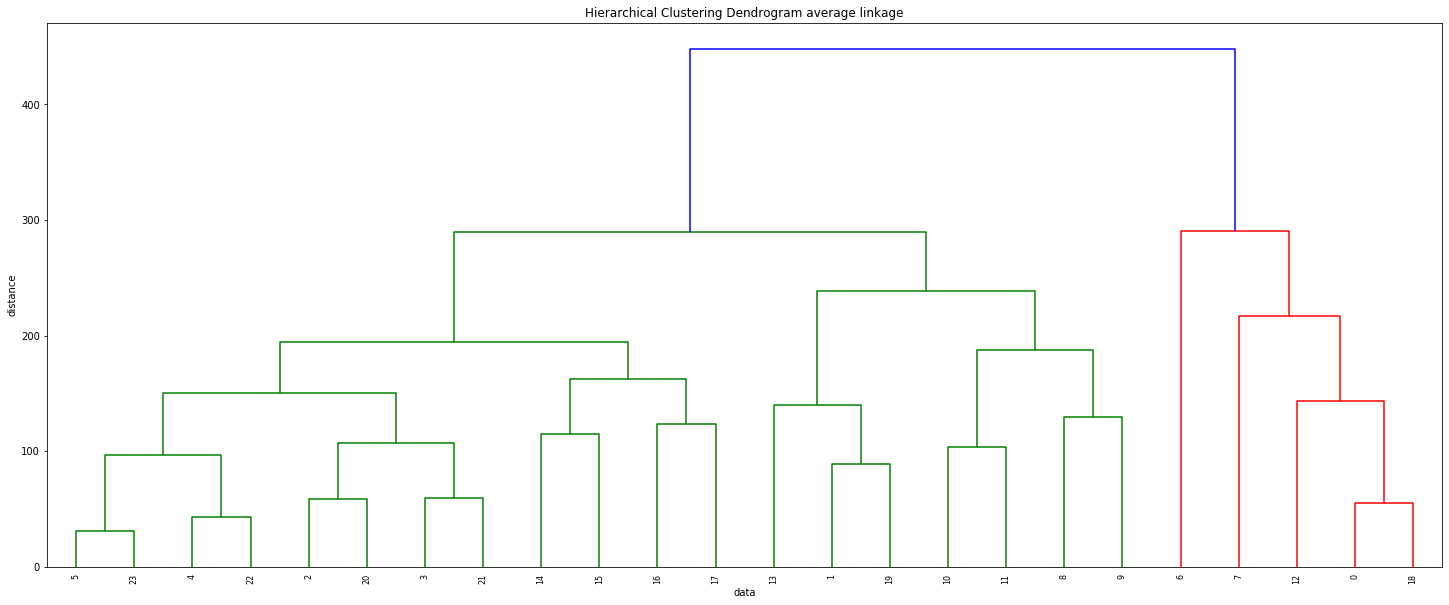

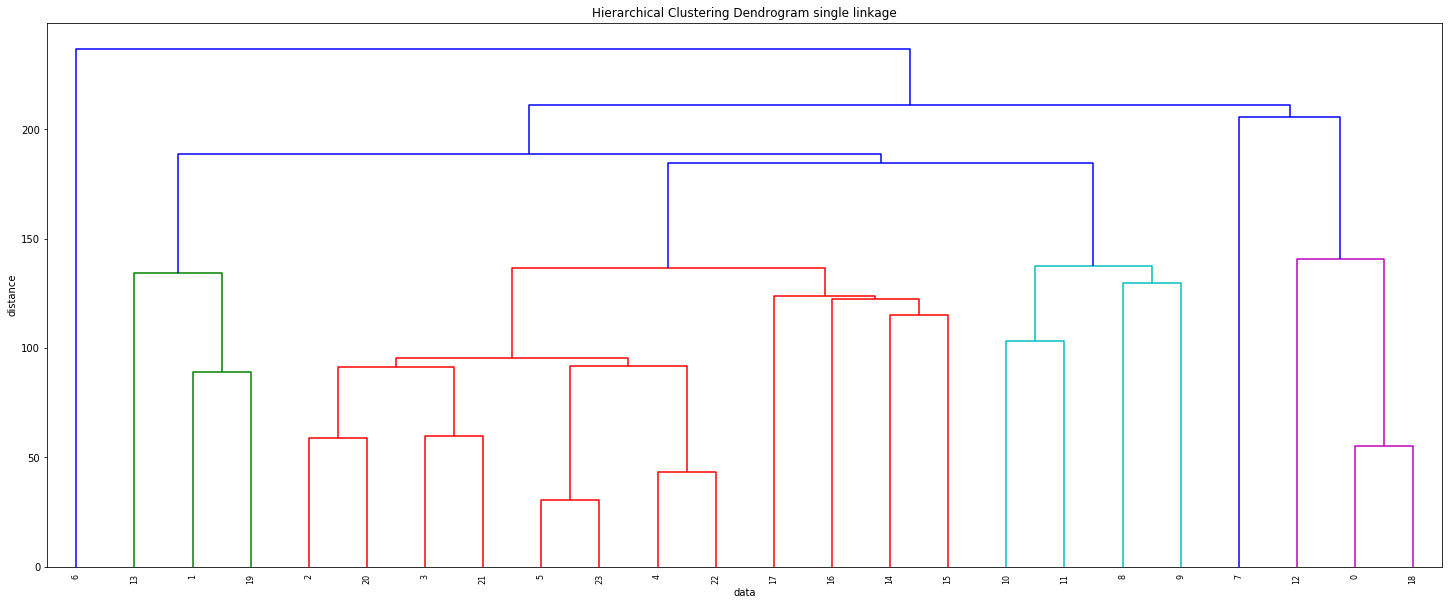

In [193]:

from scipy.cluster.hierarchy import linkage, dendrogram


hc_complete = linkage(np.transpose(X_train), "complete")
hc_average = linkage(np.transpose(X_train), "average")
hc_single = linkage(np.transpose(X_train), "single")
# dendrogram based on complete distance
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram complete linkage')
plt.xlabel('data')
plt.ylabel('distance')
dendrogram(
    hc_complete,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

# dendrogram based on average distance
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram average linkage')
plt.xlabel('data')
plt.ylabel('distance')
dendrogram(
    hc_average,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

#  dendrogram based on single distance
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram single linkage')
plt.xlabel('data')
plt.ylabel('distance')
dendrogram(
    hc_single,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)


plt.show()

conclusion:

Evaluating the details of classification accuracy is important, as often the types of mistakes made by a classifier are not equally good or bad. One can do this by looking at the confusion matrix and its summaries, including precision and recall, and looking at the ROC curve and the area under the curve.

[1] Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.